In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

In [3]:
ld = pd.read_csv("../data/ld_pruning_runtimes.csv")
ld.head()

,r2_amts,window_amts,runtimes
0,0.5,10,43
1,0.5,100,46
2,0.5,1000,54
3,0.5,10000,130
4,0.5,100000,756


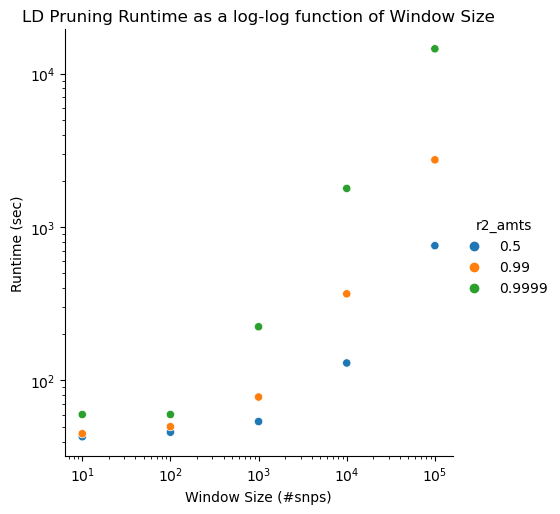

In [7]:
ld.r2_amts = ld.r2_amts.astype('str')
sns.relplot(data=ld, x='window_amts', y='runtimes', hue='r2_amts')
plt.title("LD Pruning Runtime as a log-log function of Window Size")
plt.ylabel("Runtime (sec)")
plt.xlabel("Window Size (#snps)")
plt.xscale('log')
plt.yscale('log')

In [13]:
snp_size = pd.read_csv("../data/snp_size_window.csv")
snp_size.drop([0, 5, 10], inplace=True)
snp_size.reset_index(drop=True, inplace=True)
snp_size.head()

,r2_vals,window_size,num_snps
0,0.50,100,98666
1,0.50,1000,16977
2,0.50,10000,10184
3,0.50,100000,10167
4,0.99,100,137041


In [15]:
A = pd.read_csv("../data/make_Amatrix_runtimes.csv")
A.times = abs(A.times)
A['num_snps'] = snp_size.num_snps
A.head()

,r2_out,window_out,times,num_snps
0,0.50,100,164.845985,98666
1,0.50,1000,52.866741,16977
2,0.50,10000,42.249561,10184
3,0.50,100000,42.875504,10167
4,0.99,100,223.400352,137041


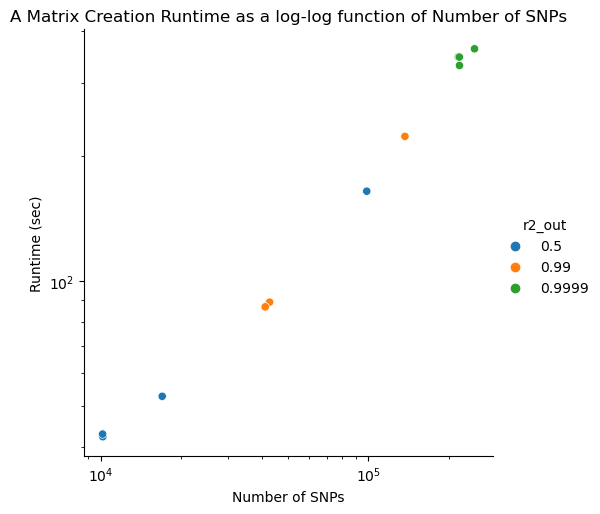

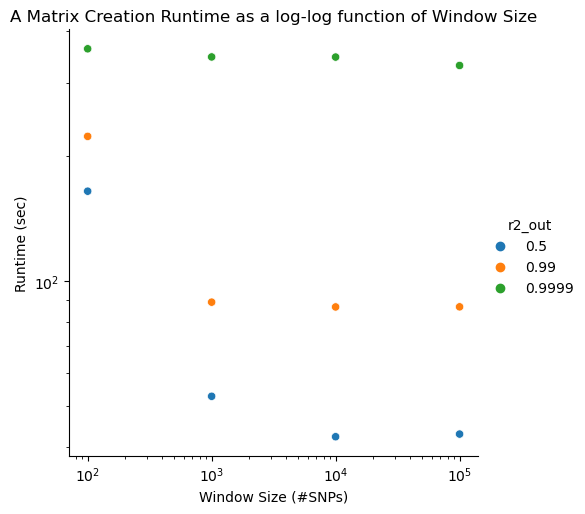

In [23]:
A.r2_out = A.r2_out.astype('str')
sns.relplot(data=A, x='num_snps', y='times', hue='r2_out')
plt.title("A Matrix Creation Runtime as a log-log function of Number of SNPs")
plt.ylabel("Runtime (sec)")
plt.xlabel("Number of SNPs")
plt.xscale('log')
plt.yscale('log')
sns.relplot(data=A, x='window_out', y='times', hue='r2_out')
plt.title("A Matrix Creation Runtime as a log-log function of Window Size")
plt.ylabel("Runtime (sec)")
plt.xlabel("Window Size (#SNPs)")
plt.xscale('log')
plt.yscale('log')

In [28]:
b = pd.read_csv("../data/blup_runtimes.csv")
b.avgtimes = abs(b.avgtimes)
b['num_snps'] = snp_size.num_snps
b.head()

,tr2s,twindows,avgtimes,num_snps
0,0.50,100,0.653568,98666
1,0.50,1000,0.625520,16977
2,0.50,10000,0.624303,10184
3,0.50,100000,0.628308,10167
4,0.99,100,0.625243,137041


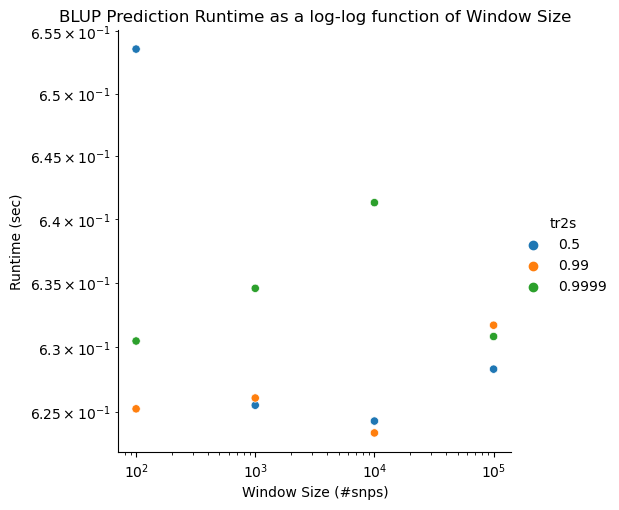

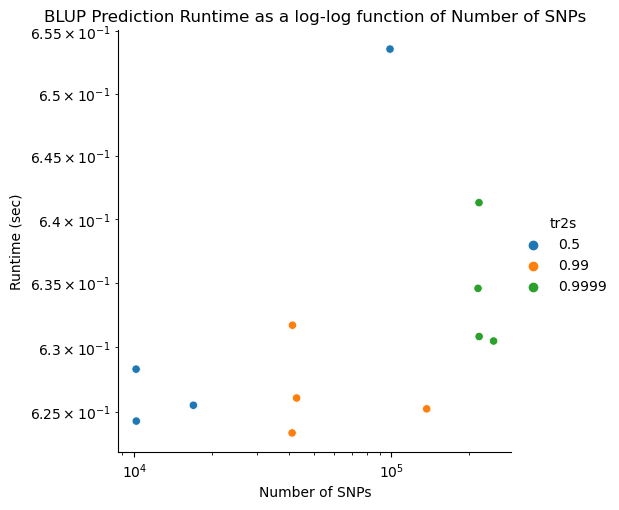

In [29]:
b.tr2s = b.tr2s.astype('str')
sns.relplot(data=b, x='twindows', y='avgtimes', hue='tr2s')
plt.title("BLUP Prediction Runtime as a log-log function of Window Size")
plt.ylabel("Runtime (sec)")
plt.xlabel("Window Size (#snps)")
plt.xscale('log')
plt.yscale('log')
sns.relplot(data=b, x='num_snps', y='avgtimes', hue='tr2s')
plt.title("BLUP Prediction Runtime as a log-log function of Number of SNPs")
plt.ylabel("Runtime (sec)")
plt.xlabel("Number of SNPs")
plt.xscale('log')
plt.yscale('log')

In [3]:
total = pd.read_csv("../data/pipelineruntime.csv")
total['total_runtime'] = total.LD_pruning_runtime + total.A_matrix_runtime + total.blup_pred_runtime
total

,pairwise_r2,window_size,num_snps,LD_pruning_runtime,A_matrix_runtime,blup_pred_runtime,total_runtime
0,0.5000,100,98666,46,164.845985,32.678391,243.524376
1,0.5000,1000,16977,54,52.866741,31.276006,138.142747
2,0.5000,10000,10184,130,42.249561,31.215131,203.464691
3,0.5000,100000,10167,756,42.875504,31.415381,830.290886
4,0.9900,100,137041,50,223.400352,31.262132,304.662484
5,0.9900,1000,42776,78,89.101144,31.303873,198.405017
6,0.9900,10000,41079,367,86.765458,31.169537,484.934996
7,0.9900,100000,41209,2740,86.817418,31.585789,2858.403207
8,0.9999,100,249363,60,363.050813,31.524381,454.575194
9,0.9999,1000,216937,224,347.011446,31.729578,602.741025


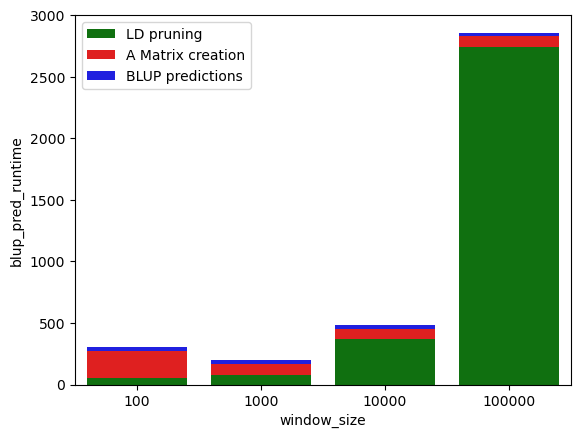

In [45]:
sns.barplot(data=total[total.pairwise_r2==0.99], x='window_size', y='LD_pruning_runtime', label='LD pruning', color='g')
sns.barplot(data=total[total.pairwise_r2==0.99], x='window_size', y='A_matrix_runtime', bottom=total[total.pairwise_r2==0.99]['LD_pruning_runtime'], label='A Matrix creation', color='r')
sns.barplot(data=total[total.pairwise_r2==0.99], x='window_size', y='blup_pred_runtime', bottom=total[total.pairwise_r2==0.99]['A_matrix_runtime'] + total[total.pairwise_r2==0.99]['LD_pruning_runtime'], label='BLUP predictions', color='b')
plt.legend()

In [31]:
rand = pd.read_csv("../data/randomlogtime.csv")
rand.rename(columns={'out_snps': "num_snps", "rprunert": 'random_pruning_runtime', 'Amatrt':"A_matrix_runtime", 'predsrt': 'blup_pred_runtime'}, inplace=True)
rand = rand.groupby('outsnps').median().reset_index()
rand.set_index('outsnps', inplace=True)
rand.head()

,random_pruning_runtime,A_matrix_runtime,blup_pred_runtime
outsnps,,,
10,1.968108,0.979991,4.231843
100,4.360780,1.008110,14.578517
1000,13.364308,2.996944,8.230070
10000,4.292520,19.409941,5.873103
50000,8.508364,79.888435,5.621571


In [70]:
total.head()

,pairwise_r2,window_size,num_snps,LD_pruning_runtime,A_matrix_runtime,blup_pred_runtime
0,0.50,100,98666,46,164.845985,32.678391
1,0.50,1000,16977,54,52.866741,31.276006
2,0.50,10000,10184,130,42.249561,31.215131
3,0.50,100000,10167,756,42.875504,31.415381
4,0.99,100,137041,50,223.400352,31.262132


In [27]:
new_total = total[total.pairwise_r2 == 0.99][['window_size', 'LD_pruning_runtime', 'A_matrix_runtime', "blup_pred_runtime"]]
new_total.set_index('window_size', inplace=True)
new_total.head()

,LD_pruning_runtime,A_matrix_runtime,blup_pred_runtime
window_size,,,
100,50,223.400352,31.262132
1000,78,89.101144,31.303873
10000,367,86.765458,31.169537
100000,2740,86.817418,31.585789


Text(0, 0.5, 'Runtime (seconds)')

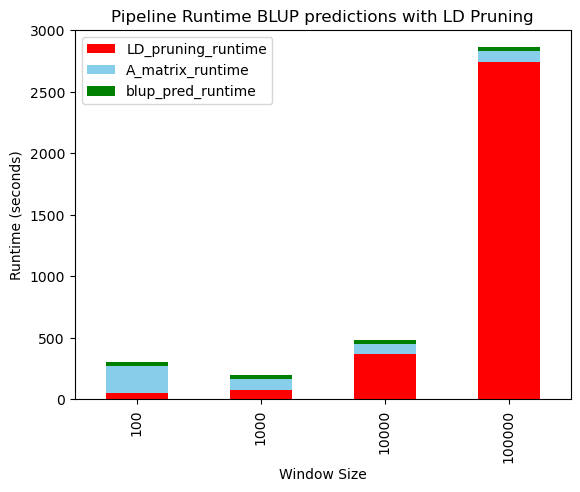

In [28]:
new_total.plot(kind='bar', stacked=True, color=['red', 'skyblue', 'green'])
plt.title("Pipeline Runtime BLUP predictions with LD Pruning")
plt.xlabel("Window Size")
plt.ylabel("Runtime (seconds)")

Text(0, 0.5, 'Runtime (seconds)')

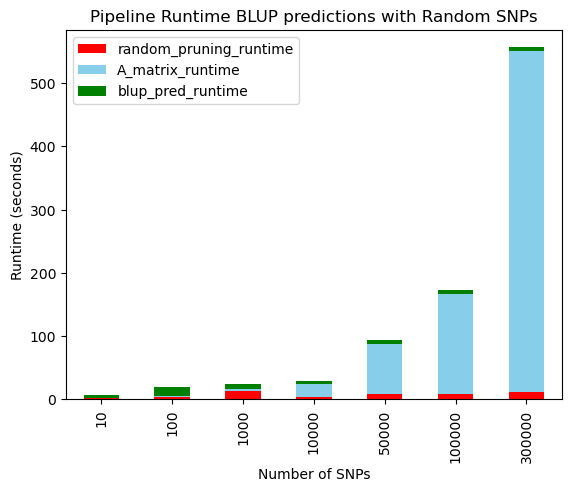

In [32]:
rand.plot(kind='bar', stacked=True, color=['red', 'skyblue', 'green'])
plt.title("Pipeline Runtime BLUP predictions with Random SNPs")
plt.xlabel("Number of SNPs")
plt.ylabel("Runtime (seconds)")

In [7]:
ldcompare = total[(total.pairwise_r2==0.99) & (total.window_size==1000)].reset_index(drop=True)
ldcompare.head()

,pairwise_r2,window_size,num_snps,LD_pruning_runtime,A_matrix_runtime,blup_pred_runtime
0,0.99,1000,42776,78,89.101144,31.303873


In [3]:
rcompare = pd.read_csv('../data/randommatch50time.csv')
rcompare.head()

,outsnps,rprunert,Amatrt,predsrt
0,42776,8.803990,82.137915,6.853099
1,42776,8.761631,81.062275,6.928764
2,42776,8.526182,80.971640,6.888819
3,42776,8.310718,79.178918,7.676504
4,42776,8.575079,76.377471,7.738832


In [23]:
compare = pd.DataFrame(columns=['prune_method', 'pruning_runtime', 'A_matrix_runtime', 'blup_pred_runtime'])
compare.loc[0] = ['ldprune', ldcompare.LD_pruning_runtime[0], ldcompare.A_matrix_runtime[0], (ldcompare.blup_pred_runtime.median() / 50)*8 + 2]
compare.loc[1] = ['random', rcompare.rprunert.median(), rcompare.Amatrt.median(), rcompare.predsrt.median()]
compare.set_index('prune_method', inplace=True)
compare.head()

,pruning_runtime,A_matrix_runtime,blup_pred_runtime
prune_method,,,
ldprune,78,89.101144,7.008620
random,8.760318,75.427434,7.048114


Text(0, 0.5, 'Runtime (seconds)')

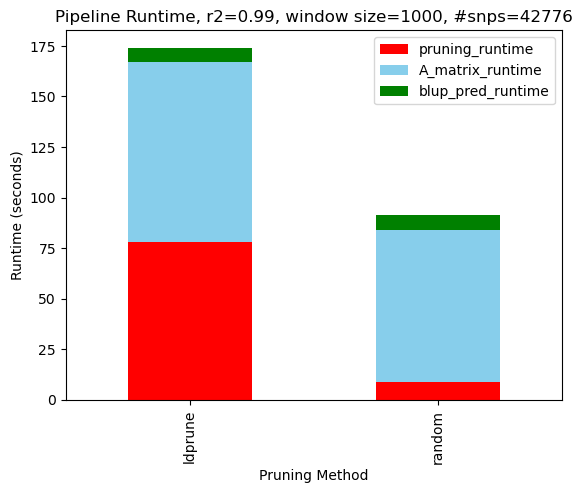

In [26]:
compare.plot(kind='bar', stacked=True, color=['red', 'skyblue', 'green'])
plt.title("Pipeline Runtime, r2=0.99, window size=1000, #snps=42776")
plt.xlabel("Pruning Method")
plt.ylabel("Runtime (seconds)")